# <font color=pink> Neural Network

<font color=pink> **The objective of this project is twofold: to delve into the study of the Keras library while advancing further in the exploration of Jupyter Notebook and Python. The project encompasses a major dataset** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

4- Each dataset will have a summary of its meaning.

# About


Our Data Science company is providing services to businesses aiming to plan for the future. To accomplish this, we will begin by working with an airline passenger database, aiming to predict future air passenger numbers.


In this dataset you will find two columns:

**Time:** This columns represents the year + the months using a math solution where 1/12 equals 0.833333. This means that if the year is 1950 and the month is march, the result will be 1950.1666667

**Passengers:** This columns represents the number of passengers in that year+month.

The second dataset contains some informations about bicycles in x region such as:
- datas (date)
- contagem (count)
- temperatura (temperature)
- sensacao (feels-like)
- umidade (moisture)
- vel_vento (wind speed)
- clima (climate)
- feriado (holiday)
- final_ds (weekend)
- estacao (station)

However, our current focus will be on the initial two terms as they both encounter the same issue with the first dataset.

In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# SKLearn Imports

from sklearn.preprocessing import StandardScaler

# Tensorflow Imports

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

# Dataset

columns_data_1 = ['Time','Passengers']
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
data_1 = pd.read_csv('Dados/Passageiros.csv', names=columns_data_1, header=0)
data_2 = pd.read_csv(url)

# Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Checking Dataset

data_1

,Time,Passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [3]:
# Configuration for mpl

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 18

<Axes: xlabel='Time', ylabel='Passengers'>

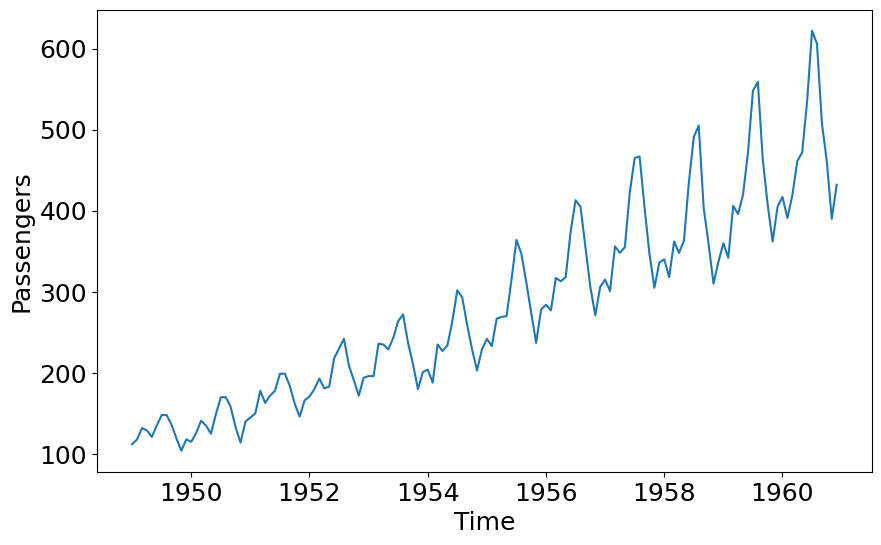

In [4]:
# Ploting dataset

sns.lineplot(x='Time', y='Passengers', data=data_1)

In [5]:
# Creating Standard Scaler

sc = StandardScaler()
sc.fit(data_1)
data_scaled = sc.transform(data_1)

In [6]:
# Setting x and y

x = data_scaled[:,0]
y = data_scaled[:,1]

Text(0.5, 0, 'Time')

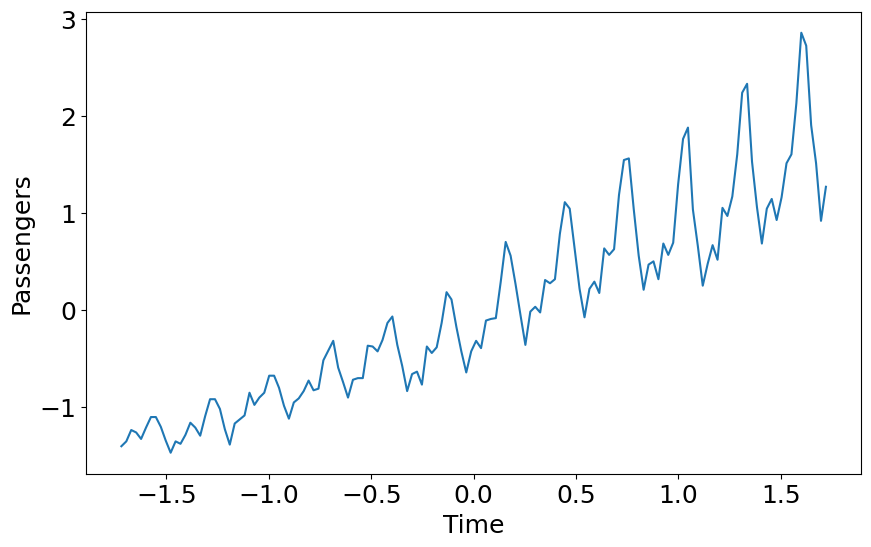

In [7]:
# Plotting scaled data

sns.lineplot(x=x, y=y, data=data_scaled)
plt.ylabel('Passengers')
plt.xlabel('Time')

In [8]:
# Setting train and test size

train_size = int(len(data_1) * 0.9)
test_size = len(data_1) - train_size

x_train = x[0:train_size]
y_train = y[0:train_size]

x_test = x[train_size:len(data_1)]
y_test = y[train_size:len(data_1)]

Text(0.5, 0, 'Time')

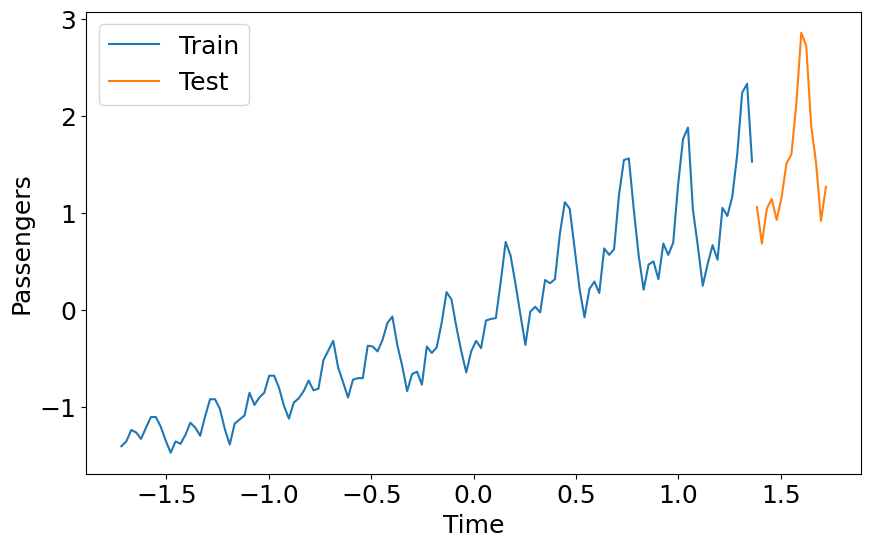

In [9]:
# Plotting train and test

sns.lineplot(x=x_train, y=y_train, label='Train')
sns.lineplot(x=x_test, y=y_test, label='Test')
plt.ylabel('Passengers')
plt.xlabel('Time')

In [10]:
# Creating Sequential

regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer="Ones", use_bias=True, activation='linear'))
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Fitting regressor

regressor.fit(x_train, y_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1285  


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


<Axes: >

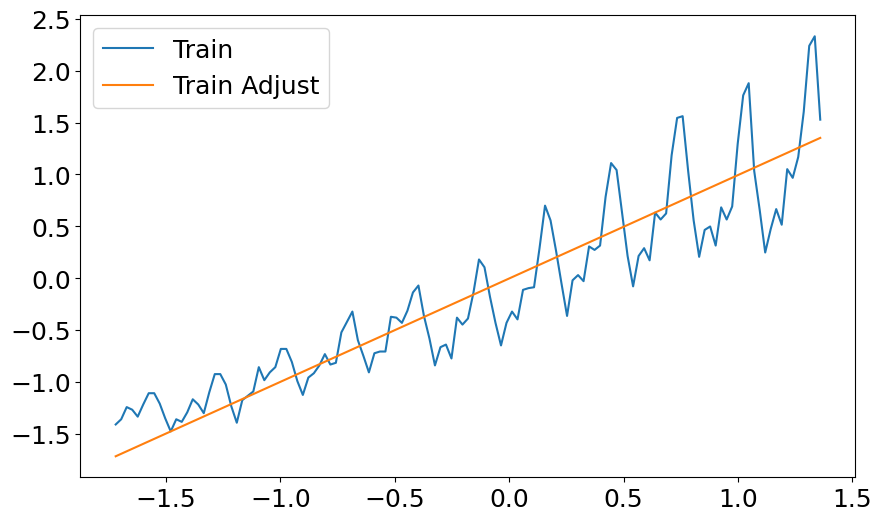

In [12]:
# Creating graphic

y_predict = regressor.predict(x_train)

sns.lineplot(x=x_train, y= y_train, label='Train')
sns.lineplot(x=x_train, y= y_predict[:,0], label='Train Adjust')


In [13]:
# Checking with false bias

regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer="Ones", use_bias=False, activation='linear'))
regressor.compile(loss='mean_squared_error', optimizer='adam')

regressor.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Fitting with false bias

regressor.fit(x_train, y_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1239  


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


<Axes: >

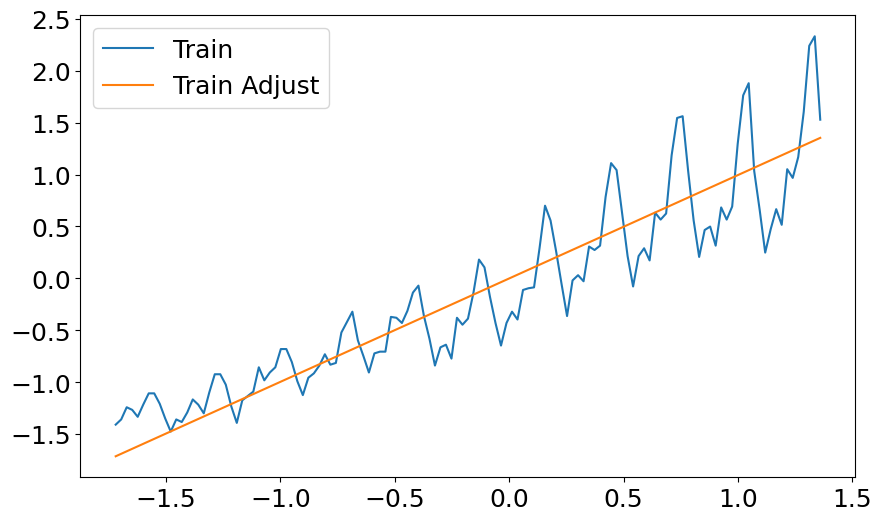

In [15]:
# Plotting with false bias

y_predict = regressor.predict(x_train)

sns.lineplot(x=x_train, y= y_train, label='Train')
sns.lineplot(x=x_train, y= y_predict[:,0], label='Train Adjust')

# The fitting seems alright with a False Bias (using this for now on)

In [16]:
# Creating dataframe to transform back to number of passengers

d = {'Time': x_train, 'Passengers': y_predict[:,0]}

results = pd.DataFrame(data=d)
results

,Time,Passengers
0,-1.720064,-1.712434
1,-1.696007,-1.688484
2,-1.671950,-1.664534
3,-1.647894,-1.640584
4,-1.623837,-1.616634
...,...,...
124,1.262984,1.257382
125,1.287041,1.281332
126,1.311098,1.305282
127,1.335155,1.329232


In [17]:
# Reverting StandardScaler

data_reverted = sc.inverse_transform(results)
data_reverted = pd.DataFrame(data_reverted, columns=['Time','Passengers'])
data_reverted

,Time,Passengers
0,1949.000000,75.578719
1,1949.083333,78.441930
2,1949.166667,81.305142
3,1949.250000,84.168353
4,1949.333333,87.031579
...,...,...
124,1959.333333,430.617414
125,1959.416667,433.480640
126,1959.500000,436.343851
127,1959.583333,439.207063


<Axes: xlabel='Time', ylabel='Passengers'>

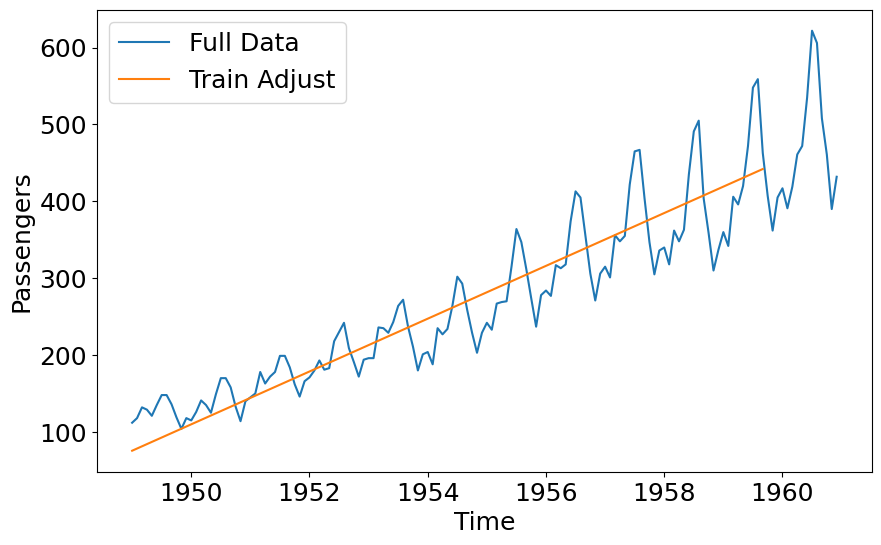

In [18]:
# Plotting line

sns.lineplot(x='Time', y='Passengers', data=data_1, label='Full Data')
sns.lineplot(x='Time', y='Passengers', data=data_reverted, label='Train Adjust')

In [19]:
# Checking test line

y_predict_test = regressor.predict(x_test)

d = {'Time': x_test, 'Passengers': y_predict_test[:,0]}

results_2 = pd.DataFrame(data=d)

data_reversed_test = sc.inverse_transform(results_2)

data_reversed_test = pd.DataFrame(data_reversed_test, columns=['Time','Passengers'])
data_reversed_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


,Time,Passengers
0,1959.750000,444.933486
1,1959.833333,447.796711
2,1959.916667,450.659923
3,1960.000000,453.523134
4,1960.083333,456.386360
5,1960.166667,459.249572
6,1960.250000,462.112783
7,1960.333333,464.975995
8,1960.416667,467.839206
9,1960.500000,470.702432


<Axes: xlabel='Time', ylabel='Passengers'>

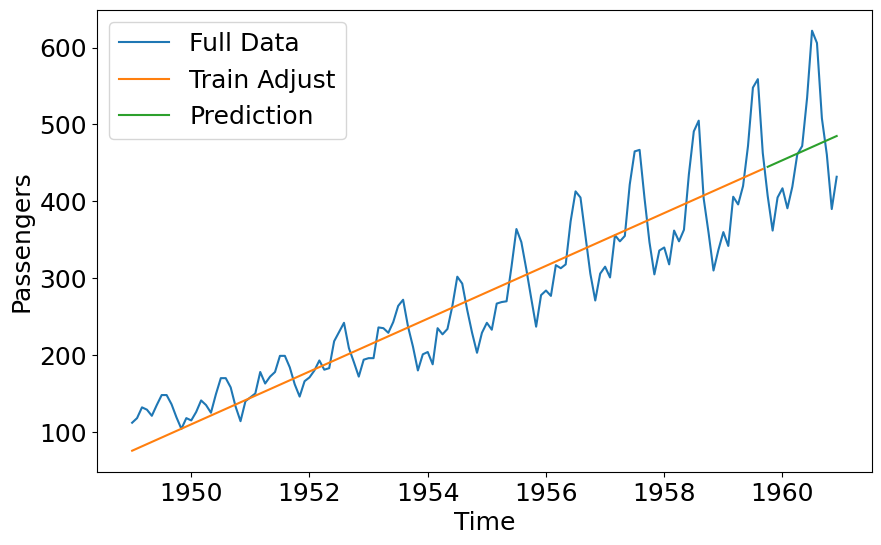

In [20]:
# Plotting

sns.lineplot(x='Time', y='Passengers', data=data_1, label='Full Data')
sns.lineplot(x='Time', y='Passengers', data=data_reverted, label='Train Adjust')
sns.lineplot(x='Time', y='Passengers', data=data_reversed_test, label='Prediction')

In [21]:
# Creating new regressor with multiple layers

regressor_2 = Sequential()
regressor_2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor_2.add(Dense(8, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor_2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor_2.compile(loss='mean_squared_error', optimizer='adam')

regressor_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Fitting regressor_2

regressor_2.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7457  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8434 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7475 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7317 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8141 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7225 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7423 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7165 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8109 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7919 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7505 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7463 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7950 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6740 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6706 
Epoch 16/200
5/5 ━

In [23]:
# Predicting y

y_predict = regressor_2.predict(x_train)
y_predict_test = regressor_2.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<Axes: >

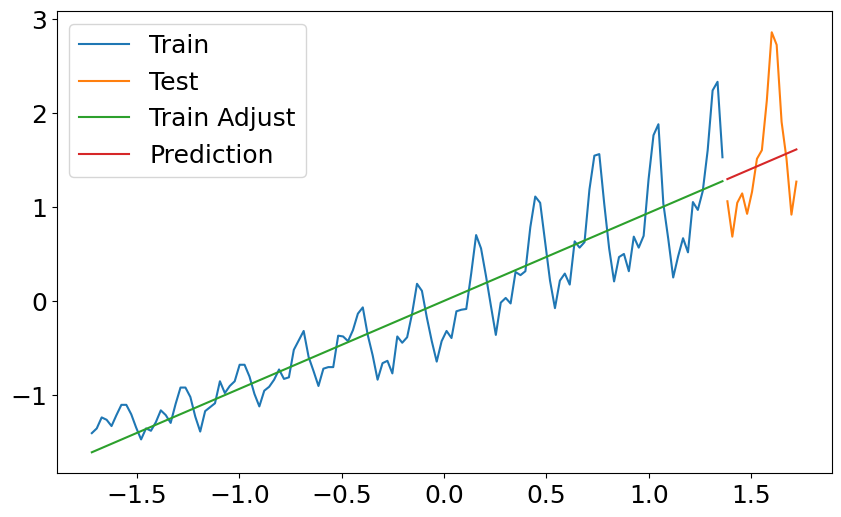

In [24]:
# Plotting train, test and adjusts

sns.lineplot(x=x_train, y=y_train, label='Train')
sns.lineplot(x=x_test, y=y_test, label='Test')
sns.lineplot(x=x_train, y=y_predict[:,0], label='Train Adjust')
sns.lineplot(x=x_test, y=y_predict_test[:,0], label='Prediction')

In [25]:
# Creating new regressor with multiple layers and non-linear activation

regressor_3 = Sequential()
regressor_3.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor_3.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor_3.compile(loss='mean_squared_error', optimizer='adam')

regressor_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Training regressor 3

regressor_3.fit(x_train, y_train, epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7801  
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7354 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7268 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8240 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7320 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7245 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7862 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6986 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7742 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7621 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7380 
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8948 
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8019 
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8020 
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6968 
Epoch 16/500
5/5 ━

In [27]:
# Predictions

y_predict = regressor_3.predict(x_train)
y_predict_test = regressor_3.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<Axes: >

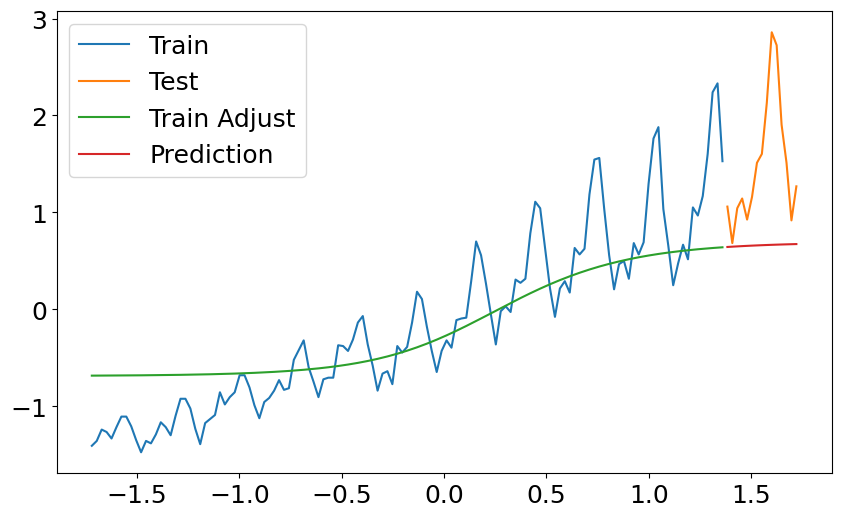

In [28]:
# Plotting train, test and adjusts Non Linear

sns.lineplot(x=x_train, y=y_train, label='Train')
sns.lineplot(x=x_test, y=y_test, label='Test')
sns.lineplot(x=x_train, y=y_predict[:,0], label='Train Adjust')
sns.lineplot(x=x_test, y=y_predict_test[:,0], label='Prediction')

In [29]:
# We know will utilize the data in a different way, we will use the passengers as our entry and our exit points

# Creating a dataframe using the y_train

vetor = pd.DataFrame(y_train)[0]

# Creating function to separate the data and create a delay between them (So we can use the second element to explain the third)

def separate_data(vetor, n_steps):
    X_new, y_new = [], []
    for i in range(n_steps, vetor.shape[0]):
        X_new.append(list(vetor.loc[i-n_steps:i-1]))
        y_new.append(vetor.loc[i])
    X_new, y_new = np.array(X_new), np.array(y_new)
    return X_new, y_new

x_train_new, y_train_new = separate_data(vetor, 1)

# Checking values of x_train_new and y_train_new

print(x_train_new[0:5], y_train_new[0:5])

[[-1.40777884]
 [-1.35759023]
 [-1.24048348]
 [-1.26557778]
 [-1.33249593]] [-1.35759023 -1.24048348 -1.26557778 -1.33249593 -1.21538918]


In [30]:
# Creating new vetor using y_test

vetor_y_test = pd.DataFrame(y_test)[0]

x_test_new, y_test_new = separate_data(vetor_y_test, 1)
print(x_test_new[0:5], y_test_new[0:5])

[[1.05982773]
 [0.68341317]
 [1.04309819]
 [1.14347541]
 [0.92599144]] [0.68341317 1.04309819 1.14347541 0.92599144 1.16020494]


In [31]:
# Creating new regressor to use on the passengers vs passengers scenario

regressor_4 = Sequential()
regressor_4.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor_4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_4.add(Dense(1, kernel_initializer='random_uniform',activation='linear', use_bias=False))

regressor_4.compile(loss='mean_squared_error', optimizer='adam')
regressor_4.fit(x_train_new, y_train_new, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8412  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7876 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7671 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6724 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6628 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7157 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6294 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6498 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6622 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5632 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5500 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4632 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4719 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3971 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3694 
Epoch 16/100
4/4 ━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: xlabel='Time', ylabel='0'>

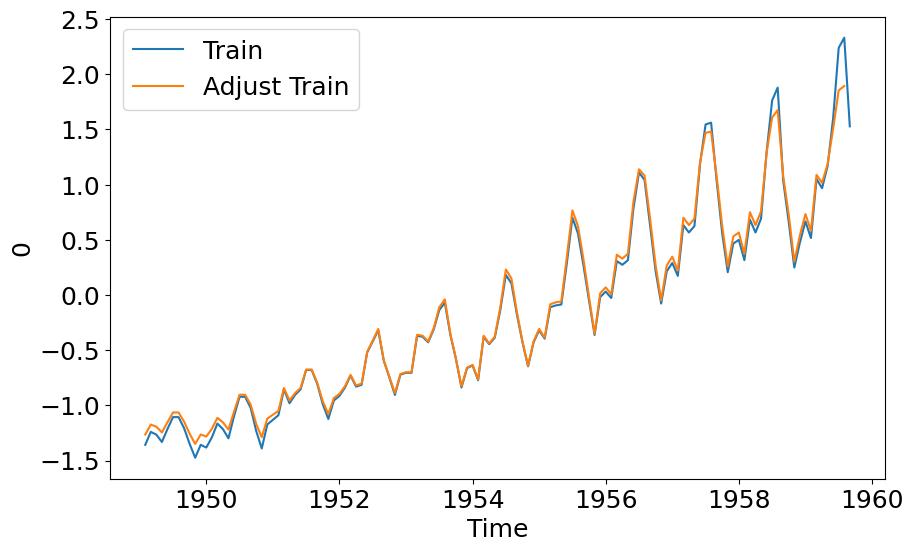

In [32]:
# Predictions

y_predict_train_new = regressor_4.predict(x_train_new)


# Plotting graphic

sns.lineplot(x='Time', y=y_train_new, data=data_1[1:129], label= 'Train')
sns.lineplot(x='Time', y=pd.DataFrame(y_predict_train_new)[0], data=data_1[1:129], label='Adjust Train')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


<Axes: xlabel='Time', ylabel='0'>

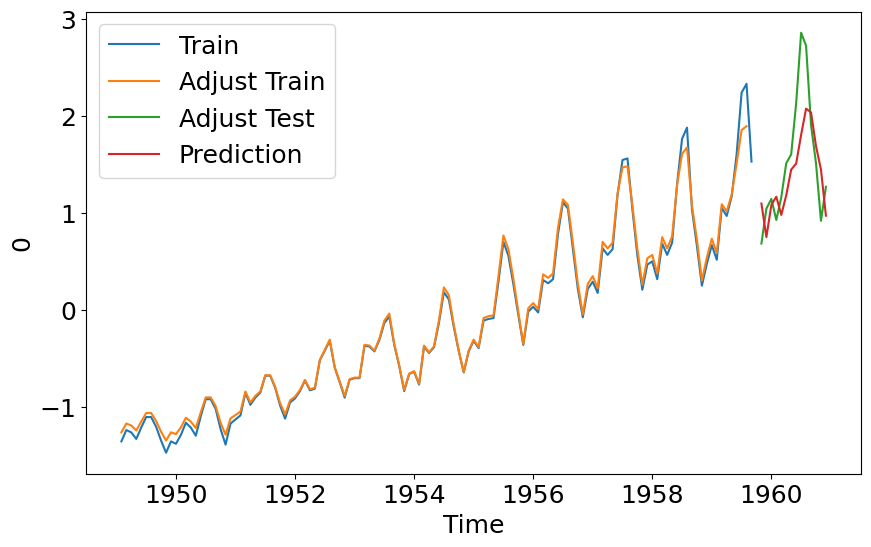

In [33]:
# Creating for the future cases using the test

y_predict_test_new = regressor_4.predict(x_test_new)

# Summaring the results

results = pd.DataFrame(y_predict_test_new)[0]


# Plotting graphic

sns.lineplot(x='Time', y=y_train_new, data=data_1[1:129], label= 'Train')
sns.lineplot(x='Time', y=pd.DataFrame(y_predict_train_new)[0], data=data_1[1:129], label='Adjust Train')
sns.lineplot(x='Time', y=y_test_new, data=data_1[130:144], label='Adjust Test')
sns.lineplot(x='Time', y=results.values, data=data_1[130:144], label='Prediction')

In [34]:
# Using more steps so the NN can choose between 4 new exit values

x_train_new, y_train_new = separate_data(vetor, 4)
x_test_new, y_test_new = separate_data(vetor_y_test, 4)

# Creating new regressor

regressor_5 = Sequential()
regressor_5.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor_5.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_5.add(Dense(1, kernel_initializer='random_uniform',activation='linear', use_bias=False))

regressor_5.compile(loss='mean_squared_error', optimizer='adam')
regressor_5.fit(x_train_new, y_train_new, epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8402  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6816 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6371 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6505 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4931
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4379 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4235 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3480 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2617 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2366 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2196 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1702 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1506 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1430 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1245 
Epoch 16/300
4/4 ━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<Axes: xlabel='Time', ylabel='0'>

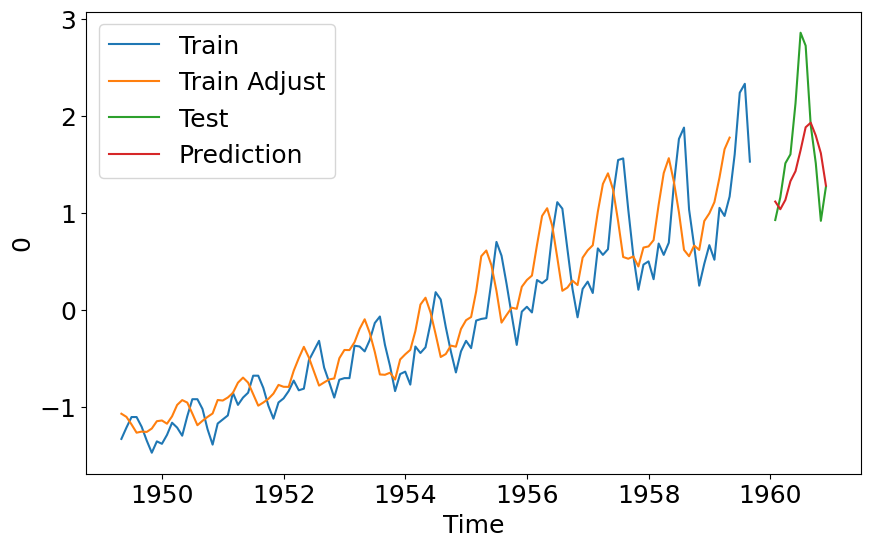

In [35]:
# Predictions

y_predict_new = regressor_5.predict(x_train_new)
y_predict_test_new = regressor_5.predict(x_test_new)

result_train = pd.DataFrame(y_predict_new)[0]
result = pd.DataFrame(y_predict_test_new)[0]

sns.lineplot(x='Time', y=y_train_new, data=data_1[4:129], label='Train')
sns.lineplot(x='Time', y=result_train, data=data_1[4:129], label='Train Adjust')
sns.lineplot(x='Time', y=y_test_new, data=data_1[133:144], label='Test')
sns.lineplot(x='Time', y=result.values, data=data_1[133:144], label='Prediction')

In [36]:
# Checking second data

data_2.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [37]:
# Changing to datetime

data_2['datas'] = pd.to_datetime(data_2['datas'])
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datas        17414 non-null  datetime64[ns]
 1   contagem     17414 non-null  int64         
 2   temperatura  17414 non-null  float64       
 3   sensacao     17414 non-null  float64       
 4   umidade      17414 non-null  float64       
 5   vel_vento    17414 non-null  float64       
 6   clima        17414 non-null  float64       
 7   feriado      17414 non-null  float64       
 8   final_ds     17414 non-null  float64       
 9   estacao      17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

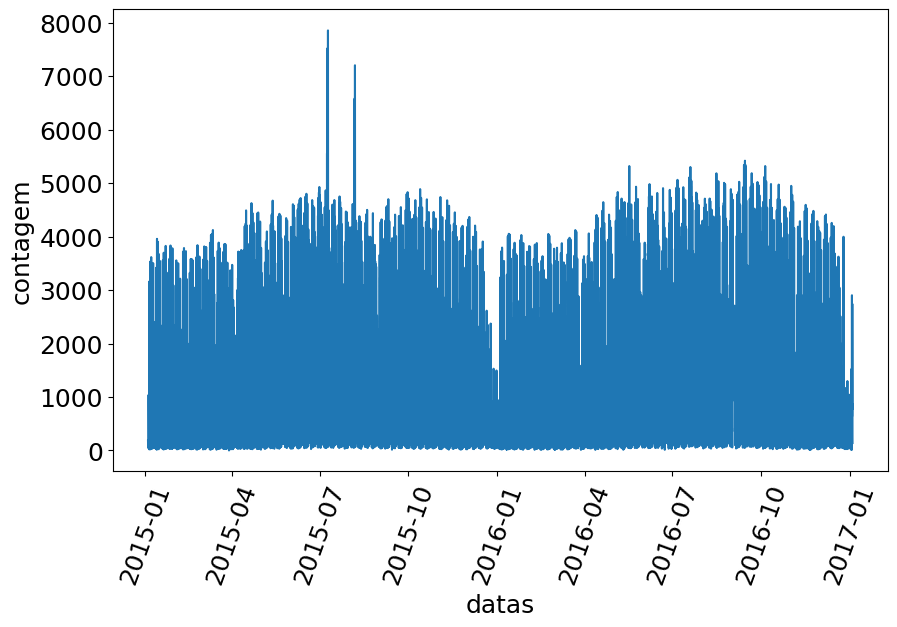

In [38]:
# Plotting info

sns.lineplot(x='datas', y='contagem', data=data_2)
plt.xticks(rotation=70)

In [39]:
# Creating Standard Scaler

sc_2 = StandardScaler()
sc_2.fit(data_2['contagem'].values.reshape(-1,1))

# Exit values

y = sc_2.transform(data_2['contagem'].values.reshape(-1,1))

In [40]:
# Creating y train/test size

train_size = int(len(data_2) * 0.9)
test_size = int(len(data_2) - train_size)

y_train = y[0:train_size]
y_test = y[train_size:len(data_2)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

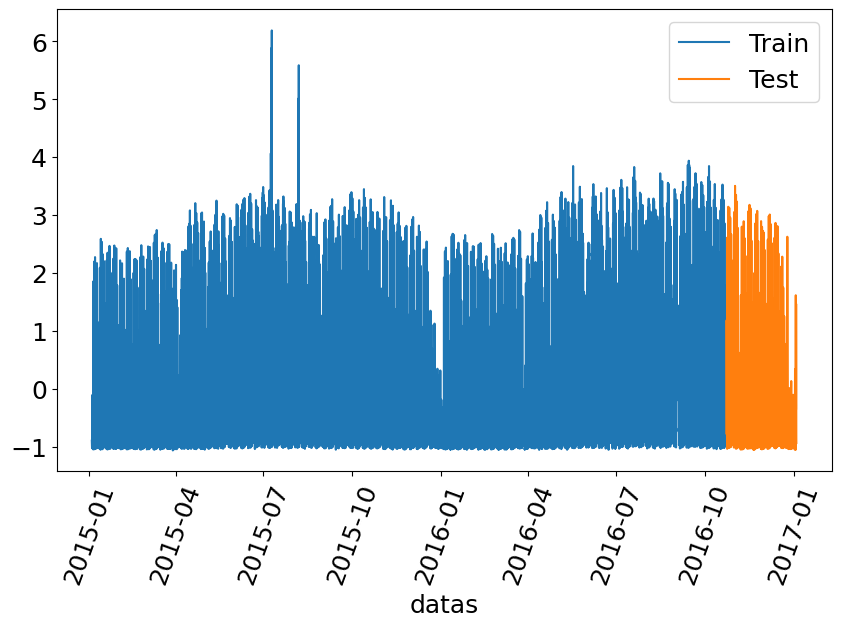

In [41]:
# Plotting y values

sns.lineplot(x='datas', y=y_train[:,0], data=data_2[0:train_size], label='Train')
sns.lineplot(x='datas', y=y_test[:,0], data=data_2[train_size:len(data_2)], label='Test')
plt.xticks(rotation=70)

In [42]:
# Creating train vetor 

vetor_train = pd.DataFrame(y_train)[0]
x_train_new, y_train_new = separate_data(vetor_train, 10)

In [43]:
# Creating test vetor

vetor_test = pd.DataFrame(y_test)[0]
x_test_new, y_test_new = separate_data(vetor_test, 10)

In [44]:
# Reshapping to aplly recurrent neural network

x_train_new = x_train_new.reshape((x_train_new.shape[0], x_train_new.shape[1], 1))
x_test_new = x_test_new.reshape((x_test_new.shape[0], x_test_new.shape[1], 1))

In [45]:
# Creating recurrent model

recurrent = Sequential()

# Entry layer

recurrent.add(LSTM(128, input_shape=(x_train_new.shape[1], x_train_new.shape[2])))

# Exit layer

recurrent.add(Dense(units=1))

# Compiling recurrent

recurrent.compile(loss='mean_squared_error', optimizer='RMSProp')
recurrent.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Adjusting recurrent

result = recurrent.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new), epochs=100)
result

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4733 - val_loss: 0.0968
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0839 - val_loss: 0.0528
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0597 - val_loss: 0.0304
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0558 - val_loss: 0.0342
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0471 - val_loss: 0.0331
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0399 - val_loss: 0.0258
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0374 - val_loss: 0.0235
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0372 - val_loss: 0.0233
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0361 - val_loss: 0.0237
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0359 - val_loss: 0.0203
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0352 - val_loss: 0.0212
Epoch 12/100
490/490 ━━━━━━━━━━━━━━━━━━━━

In [47]:
# Gettin y adjust

y_adjust = recurrent.predict(x_train_new)

490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

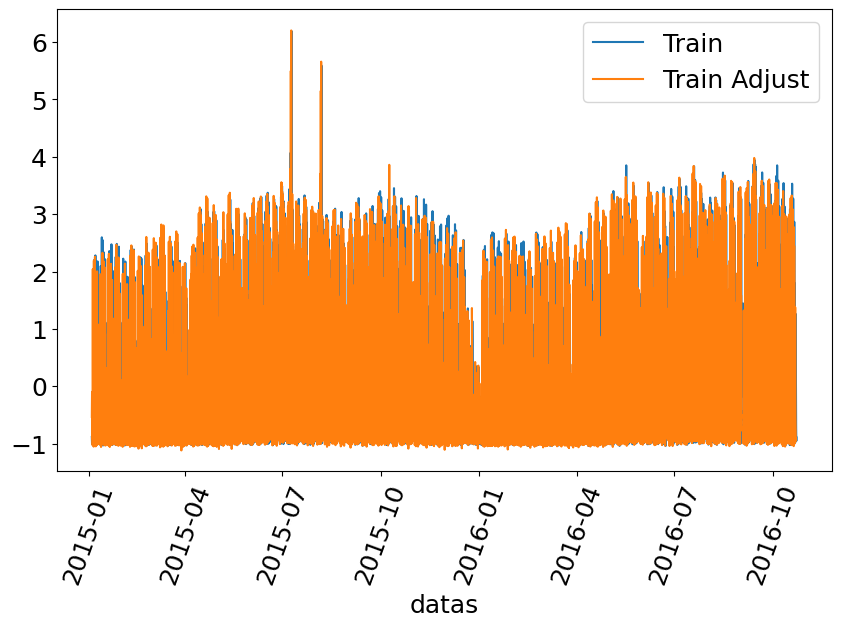

In [48]:
# Plotting

sns.lineplot(x='datas', y=y_train[:,0], data=data_2[0:train_size], label='Train')
sns.lineplot(x='datas', y=y_adjust[:,0], data=data_2[0:15662], label='Train Adjust')
plt.xticks(rotation=70)

In [49]:
# Creating y_predict

y_predict= recurrent.predict(x_test_new)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

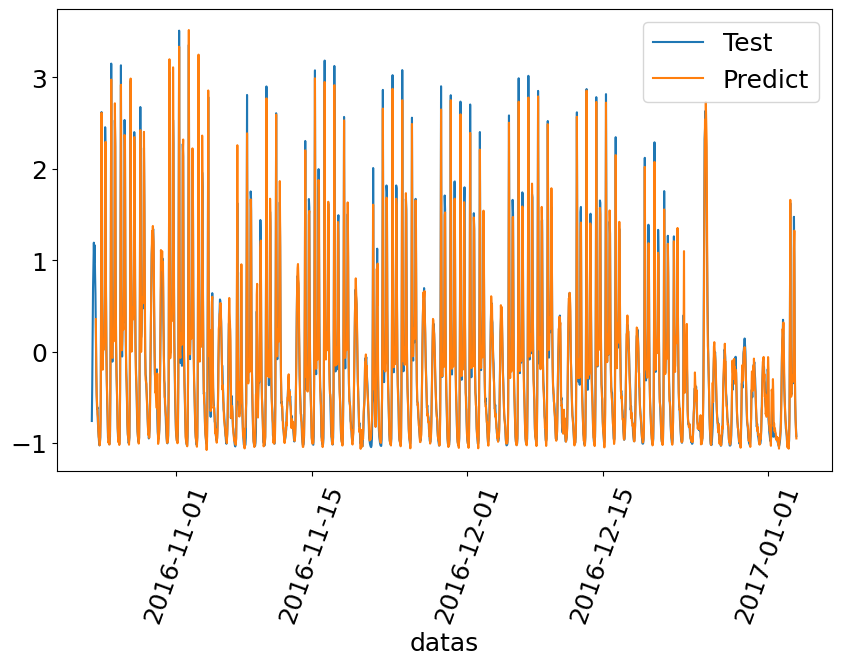

In [50]:
# Plotting future prediction

sns.lineplot(x='datas', y=y_test[:,0], data=data_2[train_size:len(data_2)], label='Test')
sns.lineplot(x='datas', y=y_predict[:,0], data=data_2[train_size+10:len(data_2)], label='Predict')
plt.xticks(rotation=70)

In [51]:
# Creating GRU for implementation

recurrent_gru = Sequential()

# Entry layer

recurrent_gru.add(GRU(128, input_shape=(x_train_new.shape[1], x_train_new.shape[2])))

# Exit layer

recurrent_gru.add(Dense(units=1))

# Compiling

recurrent_gru.compile(loss='mean_squared_error', optimizer='RMSProp')

# Summaring

recurrent_gru.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Adjusting recurrent_gru

result_gru = recurrent_gru.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new), epochs=100)
result_gru

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4107 - val_loss: 0.0878
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0786 - val_loss: 0.0715
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0555 - val_loss: 0.0366
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0450 - val_loss: 0.0259
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0400 - val_loss: 0.0270
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0361 - val_loss: 0.0208
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0371 - val_loss: 0.0224
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0332 - val_loss: 0.0204
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0317 - val_loss: 0.0258
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0322 - val_loss: 0.0210
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0306 - val_loss: 0.0191
Epoch 12/100
490/490 ━━━━━━━━━━━━━━━━━━━━

In [53]:
# Creating prediction

y_predict_gru = recurrent_gru.predict(x_test_new)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

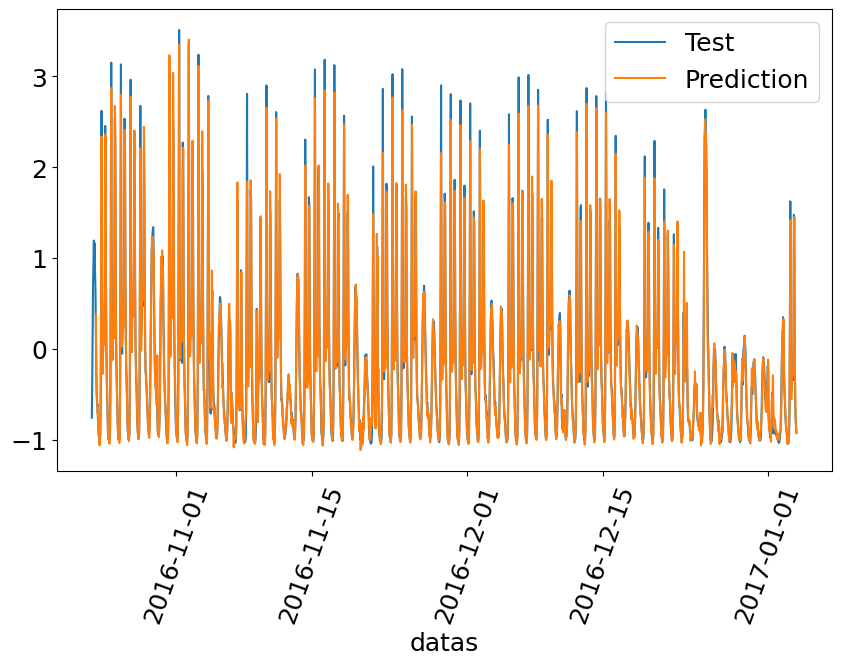

In [54]:
# Plotting

sns.lineplot(x='datas', y=y_test[:,0], data=data_2[train_size:len(data_2)], label='Test')
sns.lineplot(x='datas', y=y_predict_gru[:,0], data=data_2[train_size+10:len(data_2)], label='Prediction')
plt.xticks(rotation=70)

Text(0, 0.5, 'Cost')

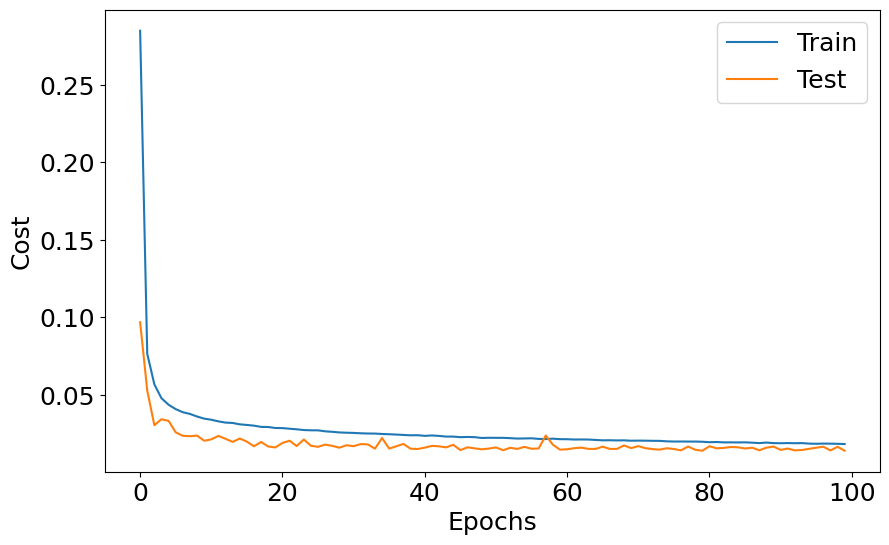

In [55]:
# Comparting results (result)

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

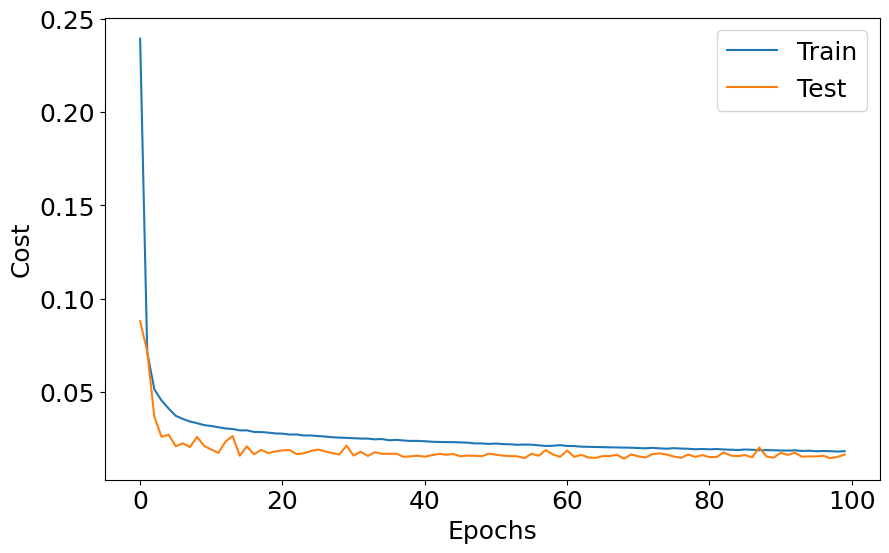

In [56]:
# Comparing results (result_gru)

plt.plot(result_gru.history['loss'])
plt.plot(result_gru.history['val_loss'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('Cost')